In [6]:
import cv2
import matplotlib.patches as patches

import matplotlib.pyplot as plt
%matplotlib inline

##讀入照片
image=cv2.imread('Dog.JPG')

##因為CV2會將照片讀成BGR，要轉回來
image=image[:,:,::-1]

## 先設BBOX格式為[X,Y,W,H]
## 也就是左上角那一點的座標以及BBOX的寬和高

In [7]:
Ground_Truth_BBOX=[1900,700,1800,1800] 
Prediction_BBOX=[1800,800,1500,1500]

## 轉換成 [X0,Y0,X1,Y1]

In [26]:
Ground_Truth_BBOX_Transform=[
    Ground_Truth_BBOX[0],
    Ground_Truth_BBOX[1],
    Ground_Truth_BBOX[0]+Ground_Truth_BBOX[2],
    Ground_Truth_BBOX[1]+Ground_Truth_BBOX[3]
    ]
Prediction_BBOX_Transform=[
    Prediction_BBOX[0],
    Prediction_BBOX[1],
    Prediction_BBOX[0]+Prediction_BBOX[2],
    Prediction_BBOX[1]+Prediction_BBOX[3]
    ]

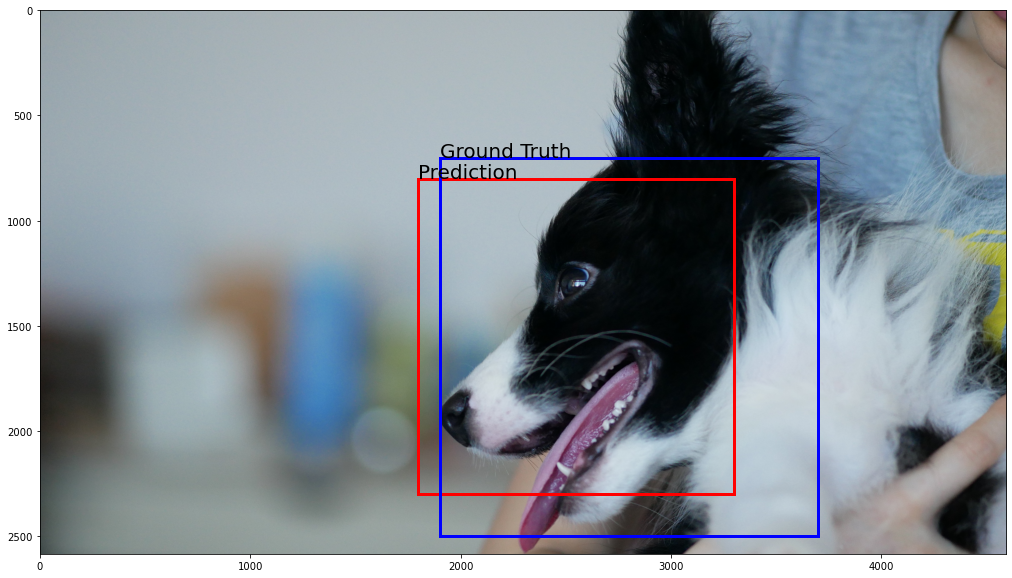

In [27]:
plt.rcParams['figure.figsize'] = (20, 10)


fig,ax = plt.subplots(1)

##畫出圖片
ax.imshow(image)

# 畫BBOX-Prediction
rect = patches.Rectangle((Prediction_BBOX[0],Prediction_BBOX[1]),Prediction_BBOX[2],Prediction_BBOX[3],linewidth=3,edgecolor='r',facecolor='none',)
ax.text(1800,800,'Prediction',size=20)
# 畫BBOX-Ground_Truth
rect_1 = patches.Rectangle((Ground_Truth_BBOX[0],Ground_Truth_BBOX[1]),Ground_Truth_BBOX[2],Ground_Truth_BBOX[3],linewidth=3,edgecolor='b',facecolor='none')
ax.text(1900,700,'Ground Truth',size=20)

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect_1)
plt.show()

## 定義IOU計算

In [37]:
Ground_Truth_BBOX_Transform

[1900, 700, 3700, 2500]

In [38]:
Prediction_BBOX_Transform

[1800, 800, 3300, 2300]

In [46]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    x0 = boxA[0]
    y0 = boxA[1]
    x1 = boxA[2]
    y1 = boxA[3]
    A0 = boxB[0]
    B0 = boxB[1]
    A1 = boxB[2]
    B1 = boxB[3]
    ## 計算交集區域
    # intersection
    H = min(x1, A1)-max(x0, A0)
    if H<=0:
        H  = 0
    
    W = min(y1, B1)-max(y0, B0)
    if W<=0:
        W  = 0

    interArea = H*W

    ## 計算各自的BBOX大小
    boxAArea = (boxA[2] - boxA[0] ) * (boxA[3] - boxA[1] )
    boxBArea = (boxB[2] - boxB[0] ) * (boxB[3] - boxB[1] )
    print(boxAArea)
    print(boxBArea)
    ## 計算IOU
    iou = interArea / (boxAArea + boxBArea -interArea )#交集/聯集 
    print(iou)
    # return the intersection over union value
    return iou

In [47]:
IOU=bb_intersection_over_union(Ground_Truth_BBOX_Transform, Prediction_BBOX_Transform)

3240000
2250000
0.6194690265486725


In [48]:
print('IOU值：',IOU) #'''應該要得到0.6196482836879266'''

IOU值： 0.6194690265486725
